# E-Greedy Bandit Algorithms

Bandit algorithms optimise single competing actions in the shortest time. A bandit algorithm learns over time (many trials) the probability distribution over competing actions, such that it can select an action that is most probable to optimise its objective.

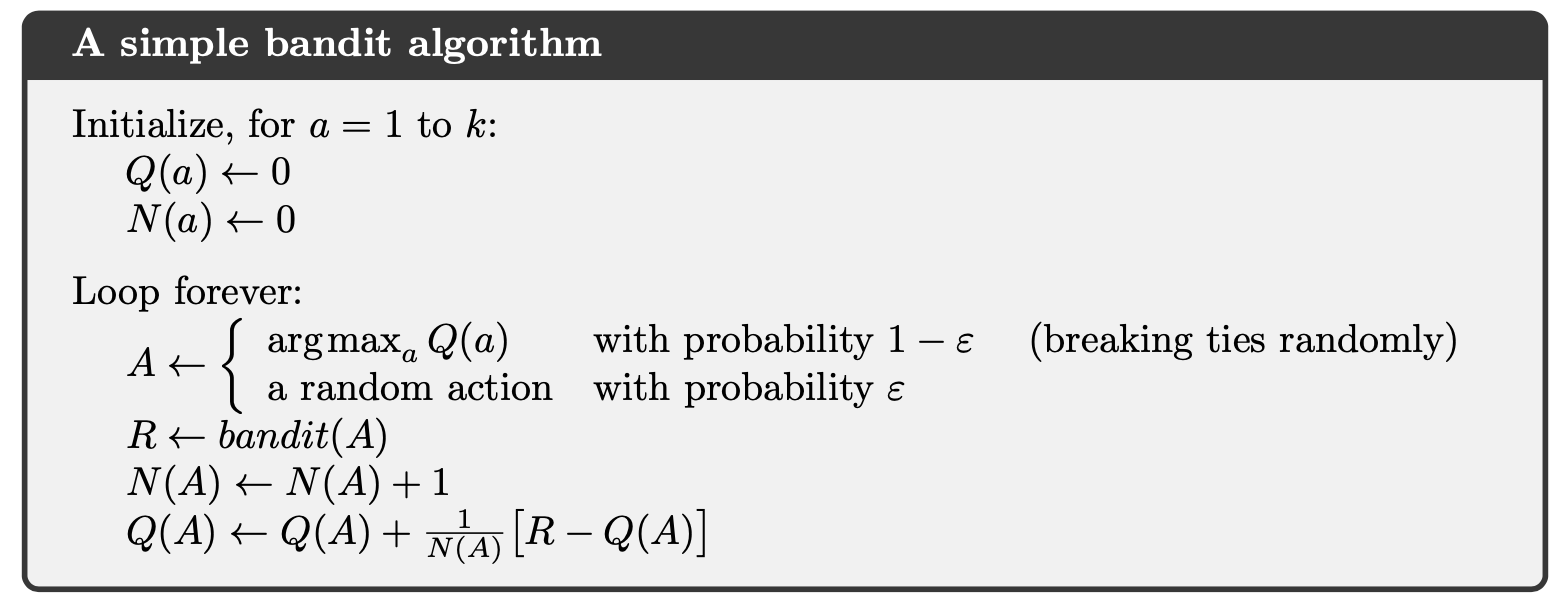

In [2]:
import pandas as pd
from IPython.display import Image
Image("./figs/bandit_algo.png")

# Simulation Environment

In [74]:
from arms.bernoulli import BernoulliArm

# Define and Simulate two-adverts, where the Probability of Click-Through (0,1) is given by a bernouli distribution.

arm0 = BernoulliArm(0.05)
arm1 = BernoulliArm(0.4)

# Arms Distribution
arms = [arm0, arm1]

In [13]:
# Inspect a Sample Arm Reward-Distribution
[arm0.draw() for _ in range(5)]

[0.0, 0.0, 0.0, 1.0, 0.0]

In [46]:
import random

class EpsilonGreedy:

    # def __init__(self, epsilon, n_arms):
    #     self.epsilon = epsilon
    #     self.counts = [0] * n_arms
    #     self.values = [0] * n_arms
    #     return

    def __init__(self, epsilon, counts, values):
        self.epsilon = epsilon
        self.counts = counts
        self.values = values
        return

    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        return

    def _max_idx(self):
        _max = max(self.values)
        return self.values.index(_max)

    def select_arm(self):
        # Exploit
        if random.random() > self.epsilon:
            return self._max_idx()
        # Explore
        else:
            return random.randrange(len(self.values))

    def update(self, selected_arm, reward):
        # Increment Count
        self.counts[selected_arm] += 1
        n = self.counts[selected_arm]

        # Increment Value
        q_curr = self.values[selected_arm]
        q_update = ((n-1) / float(n) * q_curr + (1 / float(n))) * reward

        self.values[selected_arm] = q_update
        return

In [ ]:
# test = EpsilonGreedy(0.1, 5,5)

# Assert Arm
# for i in range(0, 100):
#     print(test.select_arm())

In [65]:
# Train

def train_algorithm(algo, arms, num_sims, horizon):
    chosen_arms = [0.0 for i in range(num_sims * horizon)]
    rewards = [0.0 for i in range(num_sims * horizon)]
    cumulative_rewards = [0.0 for i in range(num_sims * horizon)]
    sim_nums = [0.0 for i in range(num_sims * horizon)]
    times = [0.0 for i in range(num_sims * horizon)]

    # sim = 3
    # horizon = 2
    for sim in range(num_sims):
        sim += 1
        algo.initialize(len(arms))

        for t in range(horizon):
            t += 1

            index = (sim - 1) * horizon + t - 1
            sim_nums[index] = sim
            times[index] = t

            chosen_arm = algo.select_arm()

            # Record Arm-Selection
            chosen_arms[index] = chosen_arm

            # Bernouli Environment to get Reward
            reward = arms[chosen_arm].draw()
            rewards[index] = reward

            if t == 1:
                cumulative_rewards[index] = reward

            else:
                # Cumulative update
                cumulative_rewards[index] = cumulative_rewards[index - 1] + reward

            algo.update(chosen_arm, reward)

    return [sim_nums, times, chosen_arms, rewards, cumulative_rewards]

# Running Bandit

In [66]:
epsilon = 1
num_sims = 1000
horizon = 250

bandit = EpsilonGreedy(epsilon, [], [])

sim_nums, times, chosen_arms, rewards, cumulative_rewards = train_algorithm(bandit, arms, 10, 2)

In [68]:
import pandas as pd
from algorithms.epsilon_greedy.standard import EpsilonGreedy
from testing_framework.tests import test_algorithm

epsilon = 1 # Choose a random action every time
num_sims = 1000 # Number of repetitions
horizon = 250 # Length of experiment

df = pd.DataFrame() # Buffer
algo1 = EpsilonGreedy(epsilon, [], []) # Algorithm
sim_nums, times, chosen_arms, rewards, cumulative_rewards = train_algorithm(
        algo1, arms, num_sims, horizon) # Running the environment/algorithm via the library
arrays = [[epsilon] * num_sims * horizon, sim_nums, times] # Constructing the output array for aggregation
index = pd.MultiIndex.from_arrays(
        arrays, names=('epsilon', 'simulation', 'time'))
df_chosen_arm = pd.DataFrame(chosen_arms, index=index)
df_chosen_arm = df_chosen_arm.groupby(level=[0, 2]).sum() / num_sims # Aggregating to result in the proportion of time
df = df.append(df_chosen_arm) #

/var/folders/gy/t2nchkdj6dv_9vl5kcnbp7wr0000gp/T/ipykernel_93609/2457060749.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_chosen_arm) #


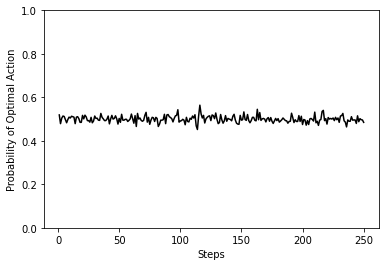

In [71]:
import matplotlib

#df.loc[1].plot()
df.loc[1].plot(legend=None,ylim=[0,1],ylabel="Probability of Optimal Action",xlabel="Steps",color="k");

In [76]:
df = pd.DataFrame()
for epsilon in [0, 0.1, 0.5, 1]:
    algo1 = EpsilonGreedy(epsilon, [], [])
    sim_nums, times, chosen_arms, rewards, cumulative_rewards = train_algorithm(
        algo1, arms, num_sims, horizon)

    arrays = [[epsilon] * num_sims * horizon, sim_nums, times]
    index = pd.MultiIndex.from_arrays(
        arrays, names=('epsilon', 'simulation', 'time'))
    df_chosen_arm = pd.DataFrame(chosen_arms, index=index)
    df_chosen_arm = df_chosen_arm.groupby(level=[0, 2]).sum() / num_sims
    df = df.append(df_chosen_arm)

/var/folders/gy/t2nchkdj6dv_9vl5kcnbp7wr0000gp/T/ipykernel_93609/3419955782.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_chosen_arm)
/var/folders/gy/t2nchkdj6dv_9vl5kcnbp7wr0000gp/T/ipykernel_93609/3419955782.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_chosen_arm)
/var/folders/gy/t2nchkdj6dv_9vl5kcnbp7wr0000gp/T/ipykernel_93609/3419955782.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_chosen_arm)
/var/folders/gy/t2nchkdj6dv_9vl5kcnbp7wr0000gp/T/ipykernel_93609/3419955782.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_chosen_arm)


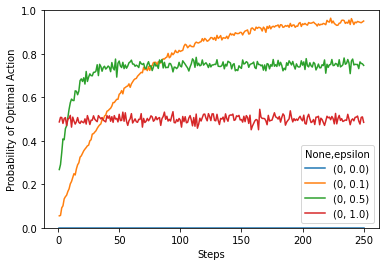

In [77]:
df.unstack(level=0).plot(ylim=[0,1],ylabel="Probability of Optimal Action",xlabel="Steps");